In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    plot_confusion_matrix,
    plot_roc_curve,
    precision_recall_curve,
)
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Initial file processing, cleaning, and splitting

file_path = 'Alzheimer_s_Disease_and_Healthy_Aging_Data.csv' #Taking in the csv
data = pd.read_csv(file_path)

columns_to_drop = ['RowId', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Response', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size', 'StratificationCategory1', 'StratificationCategory2', 'StratificationCategory3', 'Stratification3', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'ResponseID', 'LocationID', 'StratificationCategoryID3', 'StratificationID3', 'Report']
data.drop(columns_to_drop, axis=1, inplace=True)
data.dropna(inplace=True) #Dropping unused columns and rows with missing values

export_file_path = 'cleaned_data.csv' #Cleaned dataset exported
data.to_csv(export_file_path, index=False)

values = data['StratificationCategoryID2'].unique() #Seperating race and gender into different csv's
dataframes = {}
for value in values:
    dataframes[value] = data[data['StratificationCategoryID2'] == value]
for value, df in dataframes.items():
    df.to_csv(f'{value}_data.csv', index=False)

age_values = data['StratificationCategoryID1'].unique() #Seperating age into a different csv
age_dataframes = {}
for age_value in age_values:
    age_dataframes[age_value] = data[data['StratificationCategoryID1'] == age_value]
for value, df in age_dataframes.items():
    df.to_csv(f'{age_value}_data.csv', index=False)


C:\Users\Tessa\AppData\Local\Temp\ipykernel_5884\2484967458.py:4: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [3]:
#Updating Age dataset

data = pd.read_csv('AGE_data.csv') #Reading in the seperate dataset
categorical_columns = ['StratificationID1']

for column in categorical_columns: #replacing the Cognitive Decline question class with a dummy variable
    dummies = pd.get_dummies(data[column], prefix=f'{column}_dummy')
    data = pd.concat([data, dummies], axis=1)
data.insert(data.columns.get_loc('Class') + 1, 'Cognitive_Decline_dummy', data['Class'].apply(lambda x: 1 if 'Cognitive Decline' in x else 0))

for column in data.columns: #Updating dummy column names
    if 'StratificationID1_dummy_5064' in column:
        data.rename(columns={column: f'50-64'}, inplace=True)
for column in data.columns:
    if 'StratificationID1_dummy_65PLUS' in column:
        data.rename(columns={column: f'65+'}, inplace=True)

export_file_path = 'AGE_dummy.csv' #Seperate dataset with dummy variables exported
data.to_csv(export_file_path, index=False)

Accuracy: 0.9239891986571304
  Feature  Coefficient
0   50-64    -0.067897
1     65+     0.034872


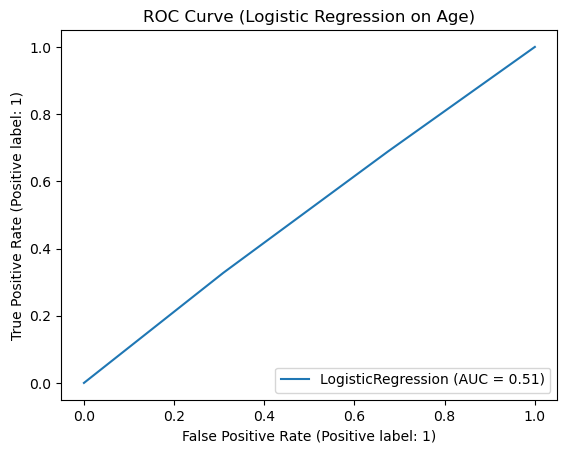

In [4]:
#Logistic Regression on Age

file_path = 'AGE_dummy.csv' #Reading in the seperate dataset
data = pd.read_csv(file_path, header=0)

dependent_variable = 'Cognitive_Decline_dummy' #Setting variables
independent_variables = ['50-64', '65+']

x = data[independent_variables]
y = data[dependent_variable]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

model = LogisticRegression() #Logistic Regression model
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

feature_importance = pd.DataFrame({'Feature': independent_variables, 'Coefficient': model.coef_[0]})
print(feature_importance)

plot_roc_curve(model, x_test, y_test)
plt.title('ROC Curve (Logistic Regression on Age)')
plt.show()

Accuracy: 0.9239891986571304
  Feature  Importance
0   50-64     0.87825
1     65+     0.12175


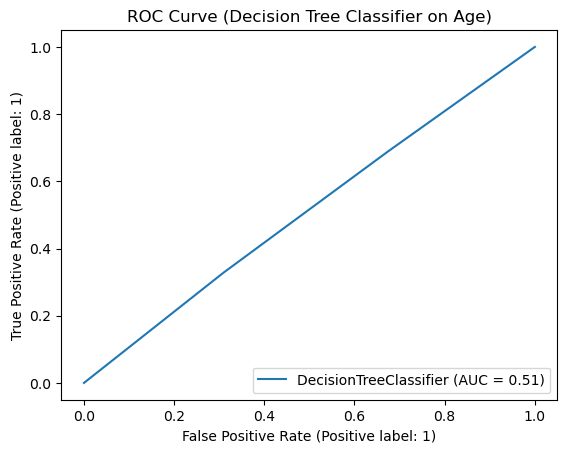

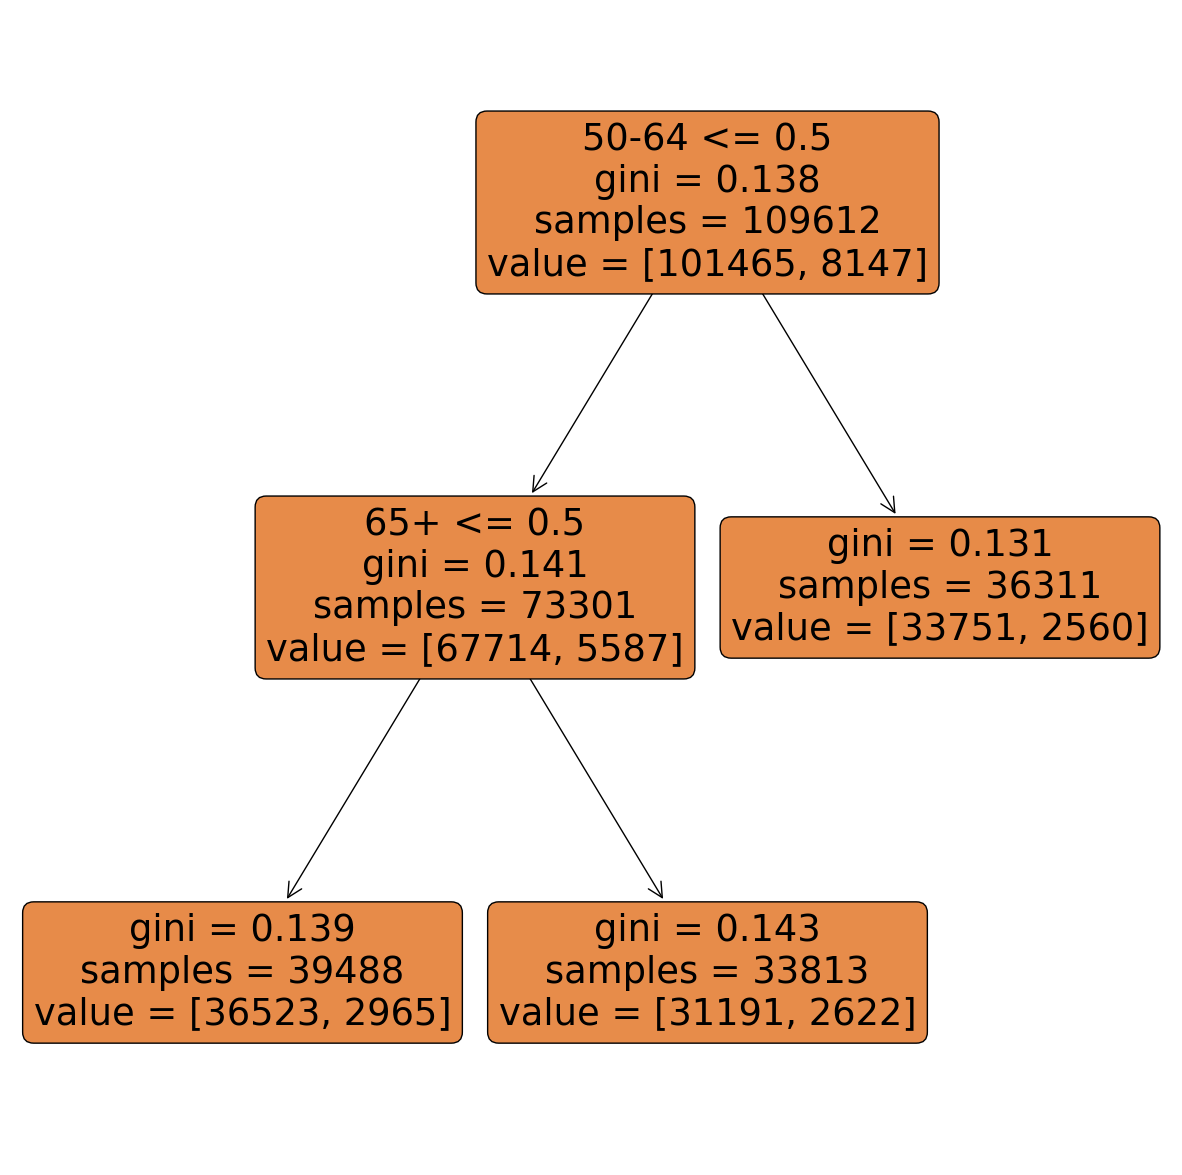

In [5]:
#Decision Tree Classifier on Age

file_path = 'AGE_dummy.csv' #Reading in the seperate dataset
data = pd.read_csv(file_path, header=0)

dependent_variable = 'Cognitive_Decline_dummy' #Setting variables
independent_variables = ['50-64', '65+']

x = data[independent_variables]
y = data[dependent_variable]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

model = DecisionTreeClassifier() #Decision Tree Classifier model
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

feature_importance = pd.DataFrame({'Feature': independent_variables, 'Importance': model.feature_importances_})
print(feature_importance)

plot_roc_curve(model, x_test, y_test)
plt.title('ROC Curve (Decision Tree Classifier on Age)')
plt.show()
plt.figure(figsize=(15, 15))
plot_tree(model, feature_names=independent_variables, filled=True, rounded=True)
plt.show()

Accuracy: 0.9239891986571304


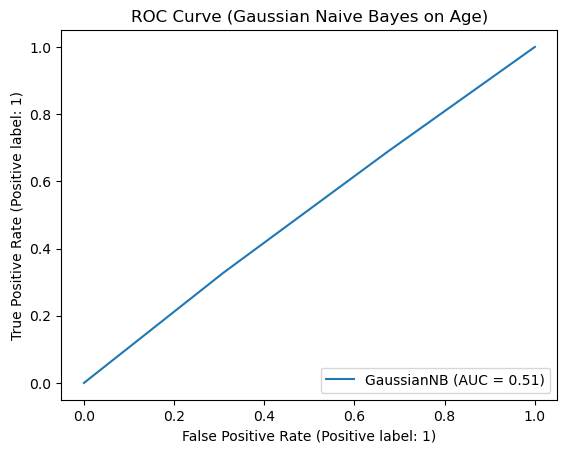

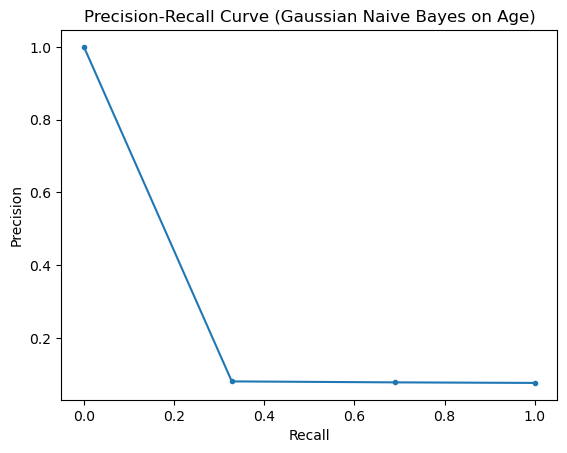

In [6]:
#Gaussian Naive Bayes on Age

file_path = 'AGE_dummy.csv' #Reading in the new seperate dataset
data = pd.read_csv(file_path, header=0)

dependent_variable = 'Cognitive_Decline_dummy' #Setting variables
independent_variables = ['50-64', '65+']

x = data[independent_variables]
y = data[dependent_variable]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

nb_model = GaussianNB() #Gaussian Naive Bayes model
nb_model.fit(x_train, y_train)

predictions = nb_model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

plot_roc_curve(nb_model, x_test, y_test)
plt.title('ROC Curve (Gaussian Naive Bayes on Age)')
plt.show()

precision, recall, _ = precision_recall_curve(y_test, nb_model.predict_proba(x_test)[:, 1])
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Gaussian Naive Bayes on Age)')
plt.show()

In [7]:
######################################################################
#Gender

In [22]:
#Updating Gender dataset

data = pd.read_csv('GENDER_data.csv')
categorical_columns = ['StratificationID2']

for column in categorical_columns: #replacing the Cognitive Decline question class with a dummy variable
    dummies = pd.get_dummies(data[column], prefix=f'{column}_dummy')
    data = pd.concat([data, dummies], axis=1)
data.insert(data.columns.get_loc('Class') + 1, 'Cognitive_Decline_dummy', data['Class'].apply(lambda x: 1 if 'Cognitive Decline' in x else 0))

for column in data.columns: #Updating dummy column names
    if 'StratificationID2_dummy_MALE' in column:
        data.rename(columns={column: f'MALE'}, inplace=True)
for column in data.columns:
    if 'StratificationID2_dummy_FEMALE' in column:
        data.rename(columns={column: f'FEMALE'}, inplace=True)

export_file_path = 'GENDER_dummy.csv' #Seperate dataset with dummy variables exported
data.to_csv(export_file_path, index=False)

Accuracy: 0.9158062620666498
  Feature  Coefficient
0    MALE    -0.031350
1  FEMALE     0.031347


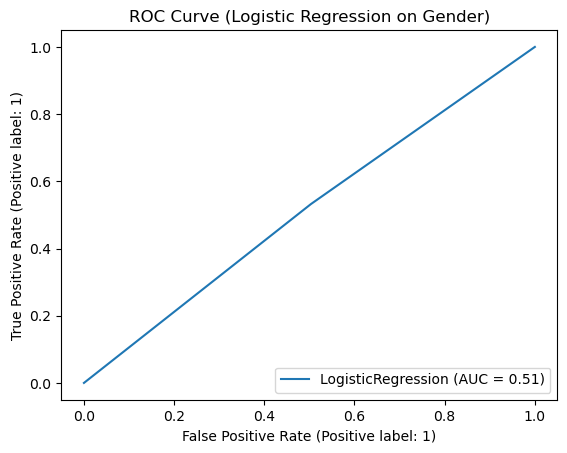

In [23]:
#Logistic Regression on Gender

file_path = 'GENDER_dummy.csv' #Reading in the seperate dataset
data = pd.read_csv(file_path, header=0)

dependent_variable = 'Cognitive_Decline_dummy' #Setting variables
independent_variables = ['MALE', 'FEMALE']

x = data[independent_variables]
y = data[dependent_variable]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

model = LogisticRegression() #Logistic Regression model
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

feature_importance = pd.DataFrame({'Feature': independent_variables, 'Coefficient': model.coef_[0]})
print(feature_importance)

plot_roc_curve(model, x_test, y_test)
plt.title('ROC Curve (Logistic Regression on Gender)')
plt.show()

Accuracy: 0.9158062620666498
  Feature  Importance
0    MALE         1.0
1  FEMALE         0.0


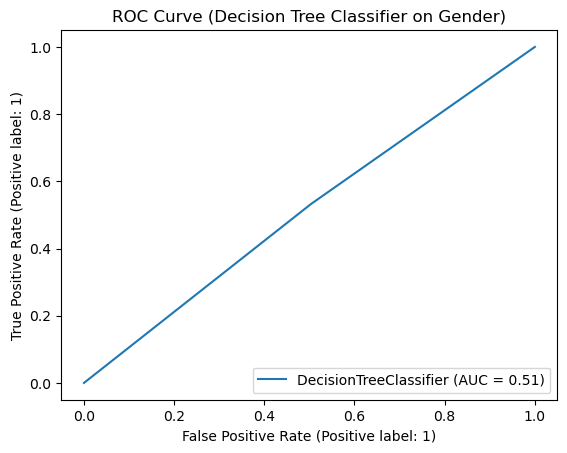

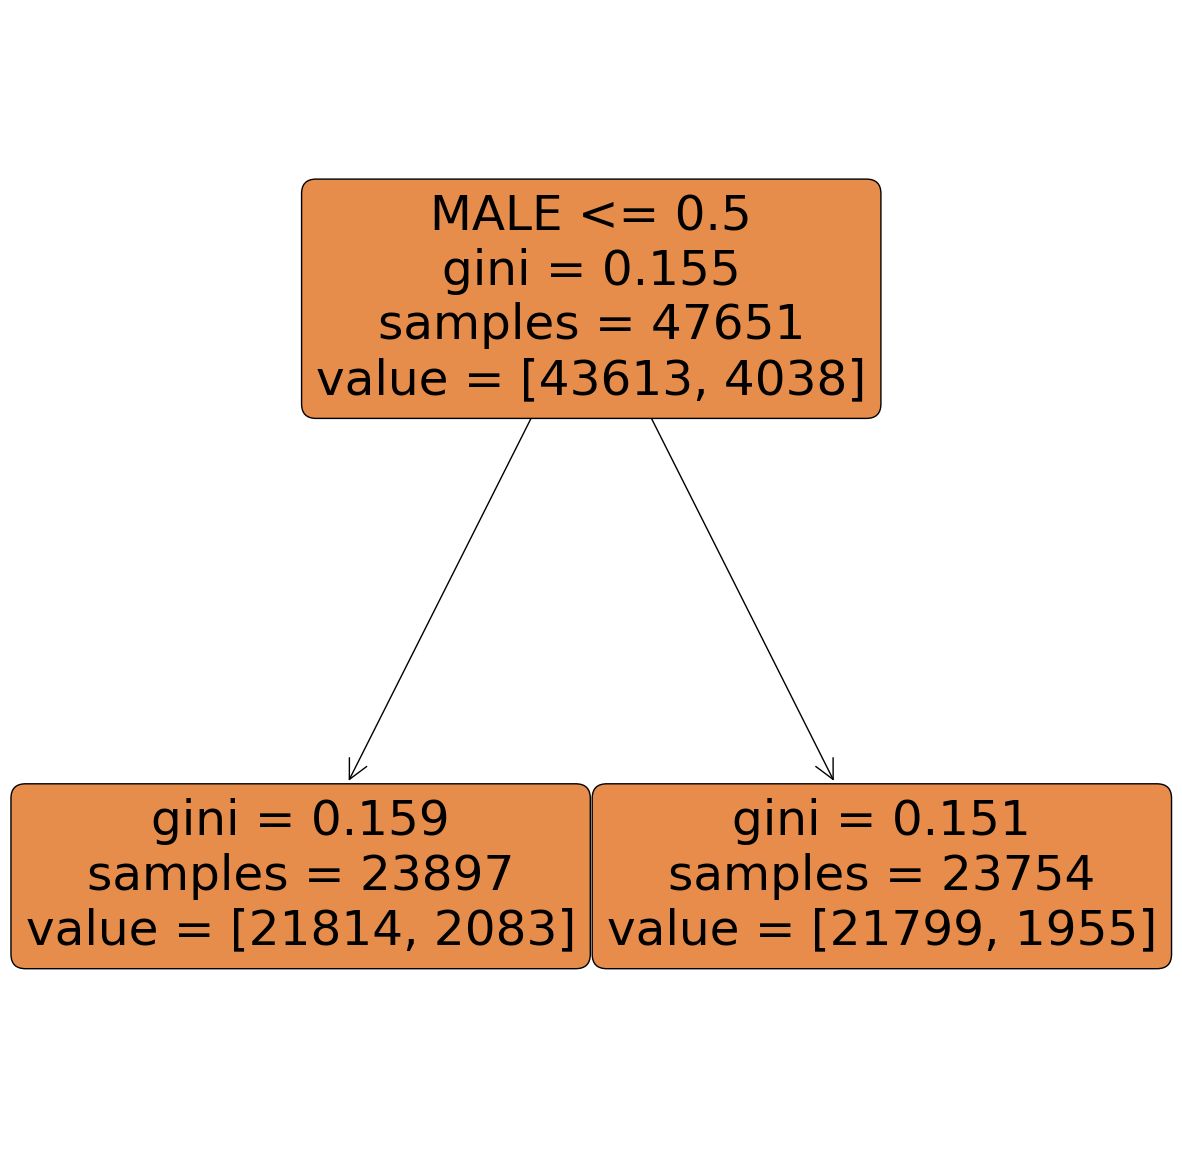

In [10]:
#Decision Tree Classifier on Gender

file_path = 'GENDER_dummy.csv' #Reading in the seperate dataset
data = pd.read_csv(file_path, header=0)

dependent_variable = 'Cognitive_Decline_dummy' #Setting variables
independent_variables = ['MALE', 'FEMALE']

x = data[independent_variables]
y = data[dependent_variable]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

model = DecisionTreeClassifier() #Decision Tree Classifier model
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

feature_importance = pd.DataFrame({'Feature': independent_variables, 'Importance': model.feature_importances_})
print(feature_importance)

plot_roc_curve(model, x_test, y_test)
plt.title('ROC Curve (Decision Tree Classifier on Gender)')
plt.show()
plt.figure(figsize=(15, 15))
plot_tree(model, feature_names=independent_variables, filled=True, rounded=True)
plt.show()

Accuracy: 0.9158062620666498


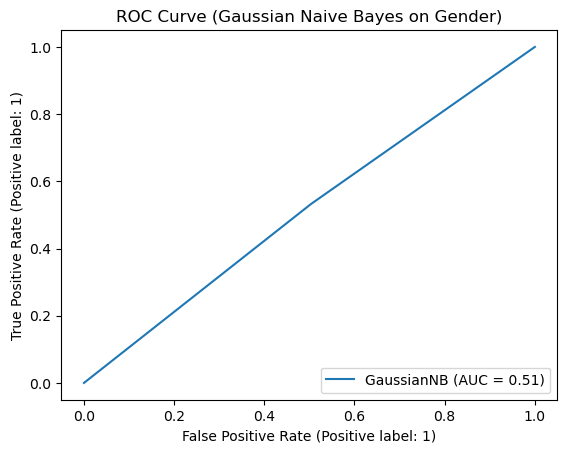

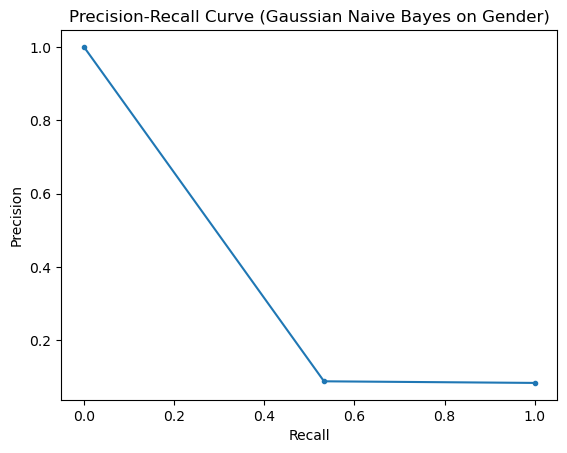

In [11]:
#Gaussian Naive Bayes on Gender

file_path = 'GENDER_dummy.csv' #Reading in the new seperate dataset
data = pd.read_csv(file_path, header=0)

dependent_variable = 'Cognitive_Decline_dummy' #Setting variables
independent_variables = ['MALE', 'FEMALE']

x = data[independent_variables]
y = data[dependent_variable]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

nb_model = GaussianNB() #Gaussian Naive Bayes model
nb_model.fit(x_train, y_train)

predictions = nb_model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

plot_roc_curve(nb_model, x_test, y_test)
plt.title('ROC Curve (Gaussian Naive Bayes on Gender)')
plt.show()

precision, recall, _ = precision_recall_curve(y_test, nb_model.predict_proba(x_test)[:, 1])
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Gaussian Naive Bayes on Gender)')
plt.show()

In [12]:
########################################################################################################################
#Race

In [13]:
#Updating Race dataset

data = pd.read_csv('RACE_data.csv') #Reading in the seperate dataset
categorical_columns = ['Stratification2']

for column in categorical_columns: #replacing the Cognitive Decline question class with a dummy variable
    dummies = pd.get_dummies(data[column], prefix=f'{column}_dummy')
    data = pd.concat([data, dummies], axis=1)
data.insert(data.columns.get_loc('Class') + 1, 'Cognitive_Decline_dummy', data['Class'].apply(lambda x: 1 if 'Cognitive Decline' in x else 0))

for column in data.columns: #Updating dummy column names
    if 'Stratification2_dummy_Asian/Pacific Islander' in column:
        data.rename(columns={column: f'Asian/Pacific Islander'}, inplace=True)
for column in data.columns:
    if 'Stratification2_dummy_Black, non-Hispanic' in column:
        data.rename(columns={column: f'Black, non-Hispanic'}, inplace=True)
for column in data.columns:
    if 'Stratification2_dummy_Hispanic' in column:
        data.rename(columns={column: f'Hispanic'}, inplace=True)
for column in data.columns:
    if 'Stratification2_dummy_Native Am/Alaskan Native' in column:
        data.rename(columns={column: f'Native Am/Alaskan Native'}, inplace=True)
for column in data.columns:
    if 'Stratification2_dummy_White, non-Hispanic' in column:
        data.rename(columns={column: f'White, non-Hispanic'}, inplace=True)        

export_file_path = 'RACE_dummy.csv' #Seperate dataset with dummy variables exported
data.to_csv(export_file_path, index=False)

Accuracy: 0.9351881737783229
                    Feature  Coefficient
0    Asian/Pacific Islander     0.334463
1  Native Am/Alaskan Native    -0.001227
2       Black, non-Hispanic    -0.284679
3                  Hispanic    -0.338887
4       White, non-Hispanic     0.290339


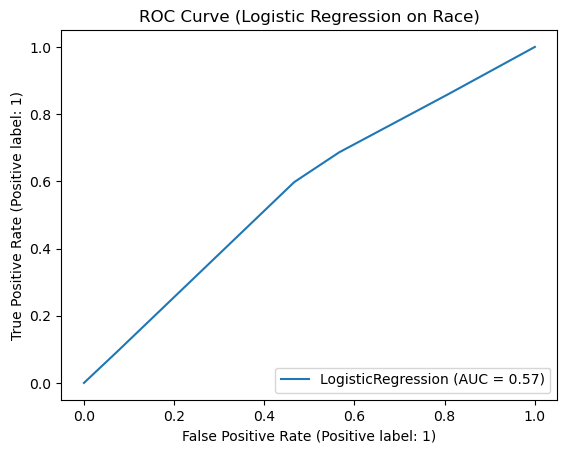

In [14]:
#Logistic Regression on Race

file_path = 'RACE_dummy.csv' #Reading in the seperate dataset
data = pd.read_csv(file_path, header=0)

dependent_variable = 'Cognitive_Decline_dummy' #Setting variables
independent_variables = ['Asian/Pacific Islander', 'Native Am/Alaskan Native', 'Black, non-Hispanic', 'Hispanic', 'White, non-Hispanic']

x = data[independent_variables]
y = data[dependent_variable]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

model = LogisticRegression() #Logistic Regression model
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

feature_importance = pd.DataFrame({'Feature': independent_variables, 'Coefficient': model.coef_[0]})
print(feature_importance)

plot_roc_curve(model, x_test, y_test)
plt.title('ROC Curve (Logistic Regression on Race)')
plt.show()

Accuracy: 0.9351881737783229
                    Feature  Importance
0    Asian/Pacific Islander    0.283279
1  Native Am/Alaskan Native    0.068637
2       Black, non-Hispanic    0.002119
3                  Hispanic    0.000000
4       White, non-Hispanic    0.645965


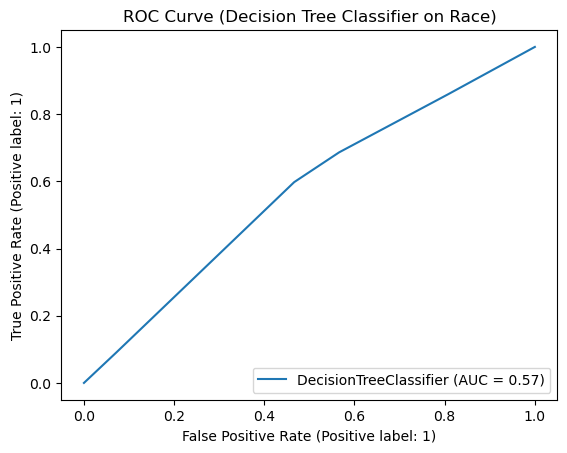

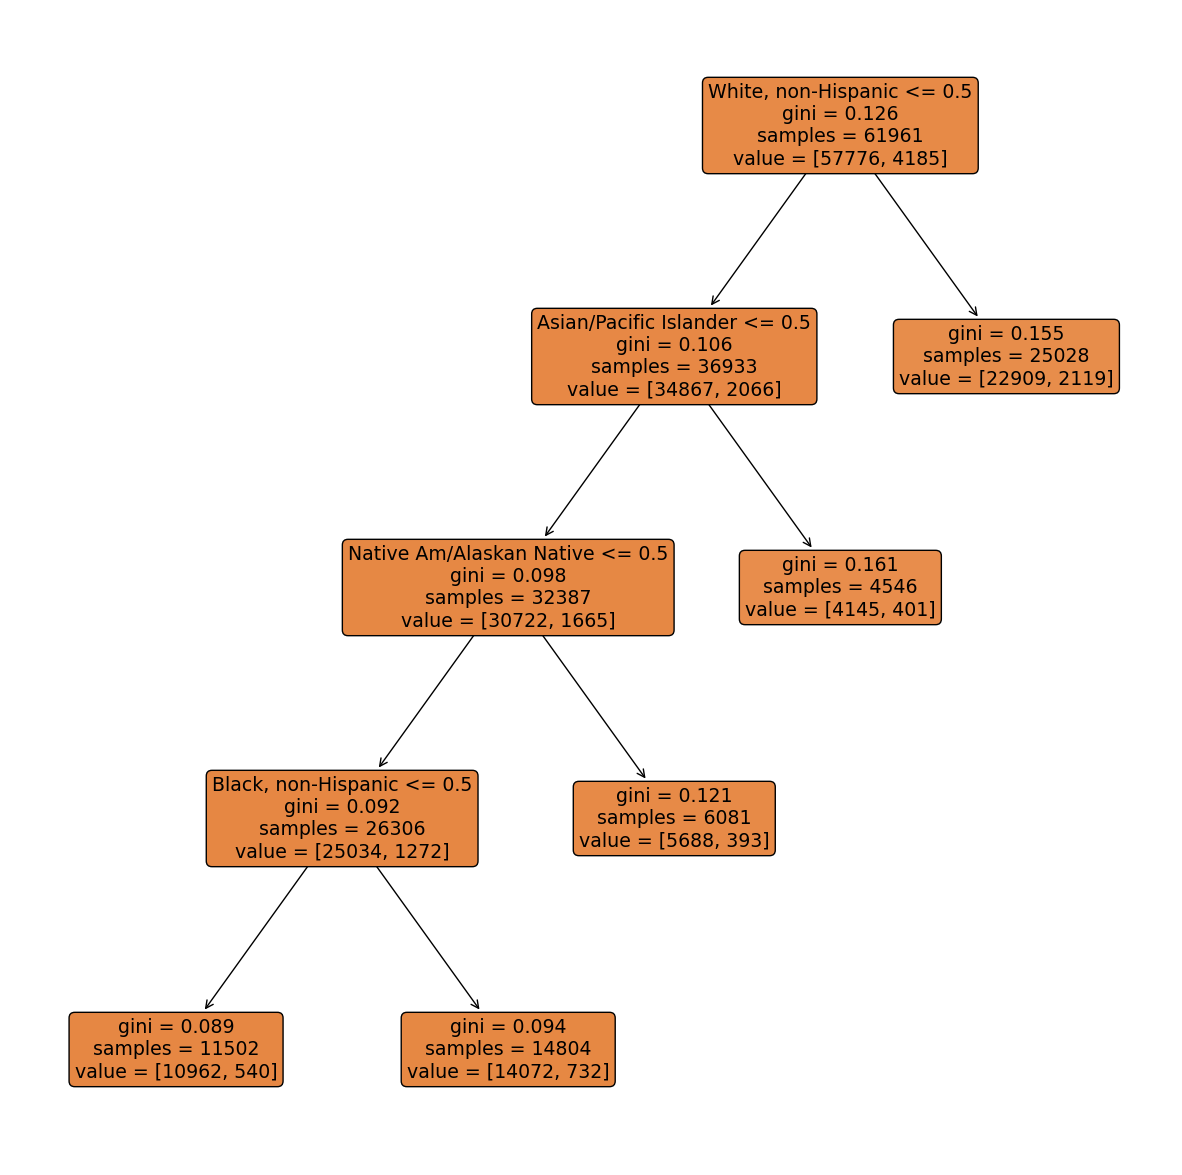

In [18]:
#Decision Tree Classifier on Race

file_path = 'RACE_dummy.csv' #Reading in the seperate dataset
data = pd.read_csv(file_path, header=0)

dependent_variable = 'Cognitive_Decline_dummy' #Setting variables
independent_variables = ['Asian/Pacific Islander', 'Native Am/Alaskan Native', 'Black, non-Hispanic', 'Hispanic', 'White, non-Hispanic']

x = data[independent_variables]
y = data[dependent_variable]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

model = DecisionTreeClassifier() #Decision Tree Classifier model
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

feature_importance = pd.DataFrame({'Feature': independent_variables, 'Importance': model.feature_importances_})
print(feature_importance)

plot_roc_curve(model, x_test, y_test)
plt.title('ROC Curve (Decision Tree Classifier on Race)')
plt.show()
plt.figure(figsize=(15, 15))
plot_tree(model, feature_names=independent_variables, filled=True, rounded=True)
plt.show()

Accuracy: 0.9351881737783229


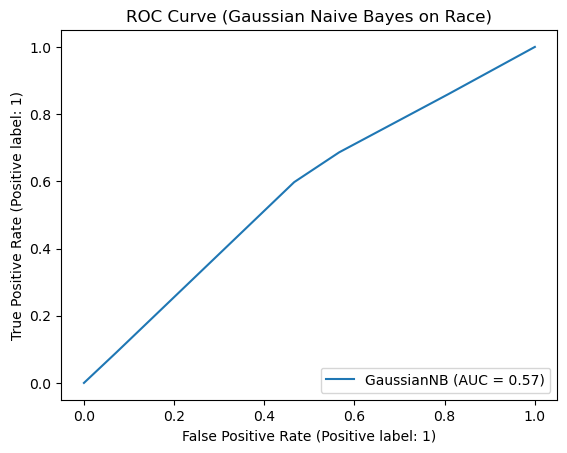

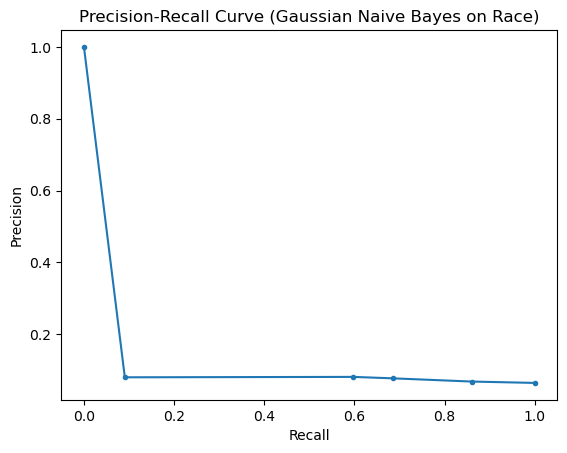

In [19]:
#Gaussian Naive Bayes on Race

file_path = 'RACE_dummy.csv' #Reading in the new seperate dataset
data = pd.read_csv(file_path, header=0)

dependent_variable = 'Cognitive_Decline_dummy' #Setting variables
independent_variables = ['Asian/Pacific Islander', 'Native Am/Alaskan Native', 'Black, non-Hispanic', 'Hispanic', 'White, non-Hispanic']

x = data[independent_variables]
y = data[dependent_variable]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

nb_model = GaussianNB() #Gaussian Naive Bayes model
nb_model.fit(x_train, y_train)

predictions = nb_model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

plot_roc_curve(nb_model, x_test, y_test)
plt.title('ROC Curve (Gaussian Naive Bayes on Race)')
plt.show()

precision, recall, _ = precision_recall_curve(y_test, nb_model.predict_proba(x_test)[:, 1])
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Gaussian Naive Bayes on Race)')
plt.show()

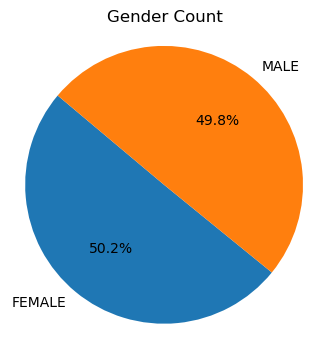

In [38]:
file_path = 'GENDER_dummy.csv'
data = pd.read_csv(file_path, header=0)

independent_variables = ['FEMALE', 'MALE']
dummy_columns = ['FEMALE', 'MALE']
counts = data[dummy_columns].sum()

plt.figure(figsize=(4, 4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Count')
plt.axis('equal')
plt.show()

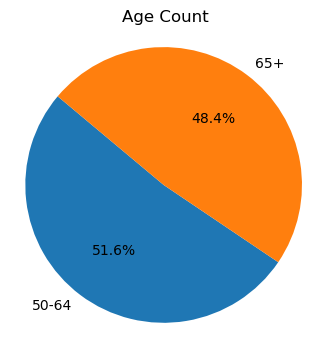

In [33]:
file_path = 'AGE_dummy.csv'
data = pd.read_csv(file_path, header=0)

independent_variables = ['50-64', '65+']
dummy_columns = ['50-64', '65+']
counts = data[dummy_columns].sum()

plt.figure(figsize=(4, 4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Count')
plt.axis('equal')
plt.show()

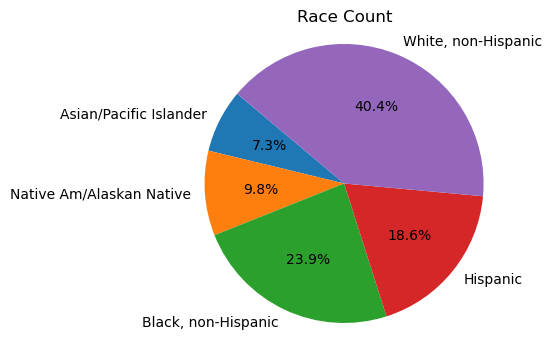

In [35]:
file_path = 'RACE_dummy.csv'
data = pd.read_csv(file_path, header=0)

independent_variables = ['Asian/Pacific Islander', 'Native Am/Alaskan Native', 'Black, non-Hispanic', 'Hispanic', 'White, non-Hispanic']
dummy_columns = ['Asian/Pacific Islander', 'Native Am/Alaskan Native', 'Black, non-Hispanic', 'Hispanic', 'White, non-Hispanic']
counts = data[dummy_columns].sum()

plt.figure(figsize=(4, 4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Race Count')
plt.axis('equal')
plt.show()

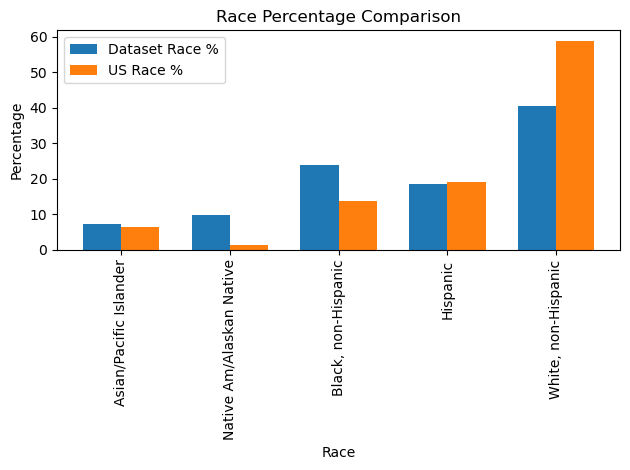

In [39]:
dataset_race = {
    'Asian/Pacific Islander': 7.3,
    'Native Am/Alaskan Native': 9.8,
    'Black, non-Hispanic': 23.9,
    'Hispanic': 18.6,
    'White, non-Hispanic': 40.4
}

#US race percentages pulled from:
#https://www.census.gov/quickfacts/fact/table/US/PST045222
us_race = {
    'Asian/Pacific Islander': 6.3,
    'Native Am/Alaskan Native': 1.3,
    'Black, non-Hispanic': 13.6,
    'Hispanic': 19.1,
    'White, non-Hispanic': 58.9,
    'Multiracial, unaccounted for': 0.8
}

race_labels = list(dataset_race.keys())
dataset_percentages = list(dataset_race.values())
us_percentages = [us_race[race] for race in race_labels]

fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(race_labels))
bar1 = ax.bar(index, dataset_percentages, bar_width, label='Dataset Race %')
bar2 = ax.bar([i + bar_width for i in index], us_percentages, bar_width, label='US Race %')
ax.set_xlabel('Race')
ax.set_ylabel('Percentage')
ax.set_title('Race Percentage Comparison')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(race_labels, rotation='vertical')
ax.legend()
plt.tight_layout()
plt.show()
